**1**

Pierwszym krokiem będzie zaimplementowanie sieci neuronowej na używanym wcześniej zestawie Fashion-Mnist tak, aby uzyskać wynik na danych testowych rzędu accuracy > 0.94
* zwiększenie liczby epok
* zwiększenie liczby neuronów w warstwie

In [1]:
import matplotlib.pyplot as plt

In [2]:
import pandas as pd

In [3]:
import tensorflow as tf

In [4]:
import numpy as np

In [5]:
# Ładowanie danych Fashion MNIST
(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.fashion_mnist.load_data()

# Normalizacja wartości pikseli
train_images = train_images / 255.0
test_images = test_images / 255.0

# Konwersja etykiet na int32
train_labels = train_labels.astype(np.int32)
test_labels = test_labels.astype(np.int32)

# Tworzenie datasetu TensorFlow
dataset = tf.data.Dataset.from_tensor_slices((train_images, train_labels))


In [6]:
from sklearn.model_selection import train_test_split

# Podział danych na zbiory treningowe i walidacyjne
X_train, X_test, y_train, y_test = train_test_split(train_images, train_labels, test_size=0.1, random_state=10, stratify=train_labels)

# stworzenie zbioru typu Dataset z naszej listy
train_ds = tf.data.Dataset.from_tensor_slices((X_train, y_train))

# ustawienie batch_size na 32 oraz przetasowanie na bazie 1000 próbek
train_ds = train_ds.shuffle(1000).batch(32)

In [7]:
from tensorflow.keras import layers

In [8]:
f_mnist_model = tf.keras.Sequential([

    layers.Flatten(input_shape=[28, 28]),

    layers.Dense(320, activation='relu'),
    layers.Dense(170, activation='relu'),

    # ostatnia warstwa posiada tyle neuronów ile mamy klas
    layers.Dense(10, activation='softmax')
])

# zwiekszenie liczy neuronow

C:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [9]:
f_mnist_model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten (Flatten)                    │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 320)                 │         251,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 170)                 │          54,570 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 10)                  │           1,710 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 307,480 (1.17 MB)

 Trainable params: 307,480 (1.17 MB)

 Non-trainable params: 0 (0.00 B)

In [10]:
f_mnist_model.compile(
    loss='sparse_categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

In [11]:
train_stats = f_mnist_model.fit(train_ds, epochs=20, verbose=1)
# Więcej epok

Epoch 1/20
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.7788 - loss: 0.6161
Epoch 2/20
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.8607 - loss: 0.3835
Epoch 3/20
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.8751 - loss: 0.3373
Epoch 4/20
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8844 - loss: 0.3114
Epoch 5/20
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.8909 - loss: 0.2914
Epoch 6/20
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.8943 - loss: 0.2788
Epoch 7/20
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.8998 - loss: 0.2619
Epoch 8/20
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 17s 10ms/step - accuracy: 0.9042 - loss: 0.2538
Epoch 9/20
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 18s 11ms/step - accuracy: 0.9095 - loss: 0.2396
Epoch 10/20
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 19s 11ms/step - accuracy: 0.9153 - loss: 0.2235
Epoch 11/20
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 27s 16ms/step - accuracy: 0.9153 - loss: 0.2233
Epoch 12/20
1688/1688 

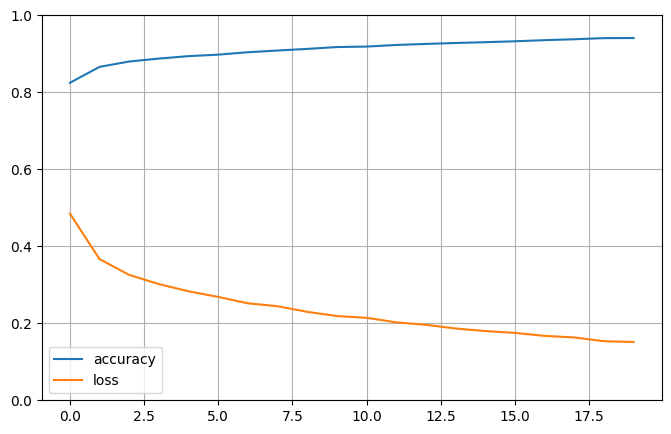

In [12]:
pd.DataFrame(train_stats.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [13]:
y_pred = f_mnist_model.predict(X_test)
print("probs : ", y_pred[2])
print("klasa :", np.argmax(y_pred[2]))
print("rzeczywista klasa: ", y_test[2])

"""
probs :  [4.0548810e-15 1.0000000e+00 9.3477974e-17 5.3090128e-13 7.5702587e-15
 5.9295928e-25 2.1536054e-11 3.4459677e-24 2.8725664e-16 2.4974258e-22]
klasa : 1
rzeczywista klasa:  1
"""

188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step   
probs :  [6.9828914e-13 8.6246314e-12 8.9403840e-14 1.0867587e-12 9.3879703e-11
 2.6167321e-05 4.4896682e-12 9.9997282e-01 1.9100918e-08 9.8307441e-07]
klasa : 7
rzeczywista klasa:  7


'\nprobs :  [4.0548810e-15 1.0000000e+00 9.3477974e-17 5.3090128e-13 7.5702587e-15\n 5.9295928e-25 2.1536054e-11 3.4459677e-24 2.8725664e-16 2.4974258e-22]\nklasa : 1\nrzeczywista klasa:  1\n'

In [14]:
test_ds = tf.data.Dataset.from_tensor_slices((X_test, y_test)).batch(32)

test_loss, test_accuracy = f_mnist_model.evaluate(test_ds, verbose=1)
print(f"Test Accuracy: {test_accuracy:.4f}")


188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8940 - loss: 0.3513
Test Accuracy: 0.8928


**2**

Drugim krokiem będzie zapisanie i dostarczenie modelu oraz napisanie interfejsu, który przyjmuje wartość wejściową oraz zwraca wartość przewidzianą przez nasz model wraz z wyrysowanym obrazem wejściowym (aby można było zweryfikować wizualnie, czy działa).

In [15]:
# Zapisanie modelu
f_mnist_model.save('fashion_mnist_model.keras')


In [16]:
# Załadowanie modelu
loaded_model = tf.keras.models.load_model('fashion_mnist_model.keras')


In [17]:
import matplotlib.pyplot as plt
import numpy as np

def predict_and_plot(model, image):
    # Dodajemy wymiar dla batch size (model wymaga batcha)
    image = np.expand_dims(image, axis=0)
    
    # Predykcja
    predictions = model.predict(image)
    predicted_label = np.argmax(predictions[0])  # Indeks klasy z największym prawdopodobieństwem
    
    # Wyświetlanie obrazu oraz przewidywania
    plt.imshow(image[0], cmap='gray')
    plt.title(f"Predicted Label: {predicted_label}")
    plt.axis('off')  # Wyłącz osie
    plt.show()

    return predicted_label


Label	Description
0	T-shirt/top
1	Trouser
2	Pullover
3	Dress
4	Coat
5	Sandal
6	Shirt
7	Sneaker
8	Bag
9	Ankle boot

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 275ms/step


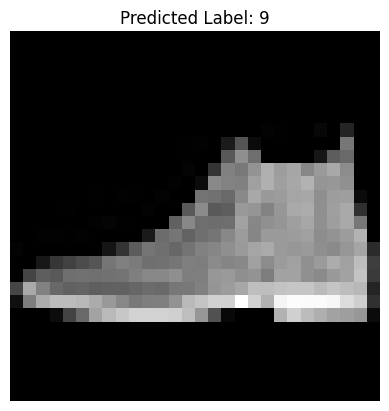

Predicted Label: 9


In [18]:
# Wybieramy pierwszy obraz z zestawu testowego
image_to_predict = test_images[0]

# Predykcja na podstawie załadowanego modelu
predicted_label = predict_and_plot(loaded_model, image_to_predict)
print(f"Predicted Label: {predicted_label}")


**3**

Trzecim krokiem będzie podbicie naszego wyniku do około 0.97 poprzez użycie technik augumentacji, czyli tworzenia nowy danych na bazie danych już istniejących.

C:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\albumentations\core\validation.py:45: UserWarning: ShiftScaleRotate is a special case of Affine transform. Please use Affine transform instead.
  original_init(self, **validated_kwargs)


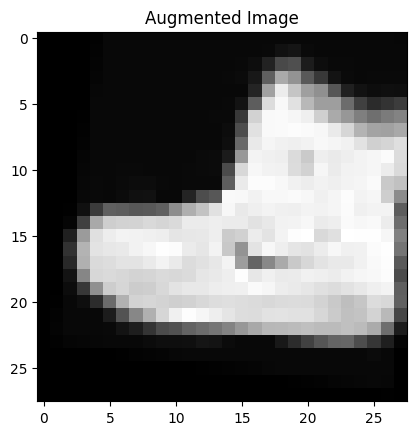

In [19]:
import albumentations as A
from tensorflow.keras.preprocessing.image import img_to_array, array_to_img

# Zdefiniowanie augmentacji
transform = A.Compose([
    A.Rotate(limit=20, p=1.0),  # Obracanie obrazu
    A.HorizontalFlip(p=0.5),  # Lustrzane odbicie
    A.RandomBrightnessContrast(p=0.2),  # Losowa zmiana jasności i kontrastu
    A.ShiftScaleRotate(shift_limit=0.1, scale_limit=0.1, rotate_limit=10, p=1.0),  # Przesunięcie i zniekształcenie
])

# Augmentacja danych
def augment_image(image):
    augmented = transform(image=image)
    return augmented['image']

# Przykład augmentacji dla jednego obrazu
augmented_image = augment_image(train_images[0])

# Wizualizacja wyników augmentacji
plt.imshow(augmented_image, cmap='gray')
plt.title("Augmented Image")
plt.show()


In [20]:
# Funkcja generująca obrazy po augmentacji
def generate_augmented_images(images, labels, batch_size=32):
    while True:
        for start in range(0, len(images), batch_size):
            end = min(start + batch_size, len(images))
            batch_images = images[start:end]
            batch_labels = labels[start:end]
            augmented_images = np.array([augment_image(img) for img in batch_images])
            yield augmented_images, batch_labels


In [21]:
# Trenowanie modelu z augmentacją
f_mnist_model.fit(generate_augmented_images(train_images, train_labels, batch_size=32), epochs=10, steps_per_epoch=len(train_images) // 32)

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 78s 42ms/step - accuracy: 0.6577 - loss: 1.0448 
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 74s 39ms/step - accuracy: 0.7415 - loss: 0.6835 
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 77s 41ms/step - accuracy: 0.7587 - loss: 0.6379 
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 76s 40ms/step - accuracy: 0.7661 - loss: 0.6166 
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 75s 40ms/step - accuracy: 0.7769 - loss: 0.5956 
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 76s 40ms/step - accuracy: 0.7815 - loss: 0.5803 
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 76s 40ms/step - accuracy: 0.7856 - loss: 0.5681 
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 78s 42ms/step - accuracy: 0.7933 - loss: 0.5565 
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 77s 41ms/step - accuracy: 0.7950 - loss: 0.5448 
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 77s 41ms/step - accuracy: 0.7964 - loss: 0.5405 


In [22]:
# Ocena modelu na zbiorze testowym
test_loss, test_acc = f_mnist_model.evaluate(test_images, test_labels)
print(f"Test accuracy: {test_acc}")


313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.8477 - loss: 0.4130 
Test accuracy: 0.8438000082969666


In [23]:
import albumentations as A
from albumentations.core.composition import OneOf
from albumentations.core.transforms_interface import ImageOnlyTransform
import cv2
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers
from sklearn.model_selection import train_test_split


In [27]:
# Funkcja do augmentacji danych
augmenter = A.Compose([
    A.Rotate(limit=10, p=0.5),
    A.ShiftScaleRotate(shift_limit=0.05, scale_limit=0.05, rotate_limit=5, p=0.5),
    A.GaussianBlur(blur_limit=(1, 3), p=0.2),
    A.HorizontalFlip(p=0.5)

])

# Funkcja do zastosowania augmentacji na całym zbiorze
def augment_images(images, labels):
    augmented_images = []
    augmented_labels = []
    for img, lbl in zip(images, labels):
        img_augmented = augmenter(image=img)['image']
        augmented_images.append(img_augmented)
        augmented_labels.append(lbl)
    return np.array(augmented_images), np.array(augmented_labels)

# Augmentacja danych
augmented_images, augmented_labels = augment_images(train_images, train_labels)

# Łączenie oryginalnych i zaugmentowanych danych
final_train_images = np.concatenate([train_images, augmented_images], axis=0)
final_train_labels = np.concatenate([train_labels, augmented_labels], axis=0)

# Podział na zbiory treningowe i walidacyjne
X_train, X_test, y_train, y_test = train_test_split(final_train_images, final_train_labels, test_size=0.1, random_state=10, stratify=final_train_labels)

# Tworzenie datasetu TensorFlow
train_ds = tf.data.Dataset.from_tensor_slices((X_train, y_train)).shuffle(1000).batch(32)
test_ds = tf.data.Dataset.from_tensor_slices((X_test, y_test)).batch(32)

### 3. Definicja modelu
#Dodamy dropout i zwiększymy liczbę neuronów w warstwach, aby poprawić generalizację.

# Definicja modelu
f_mnist_model = tf.keras.Sequential([
    layers.Flatten(input_shape=[28, 28]),
    layers.Dense(512, activation='relu'),
    layers.Dropout(0.3),
    layers.Dense(256, activation='relu'),
    layers.Dropout(0.3),
    layers.Dense(10, activation='softmax')
])

# Kompilacja modelu
f_mnist_model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# Trening modelu
train_stats = f_mnist_model.fit(train_ds, validation_data=test_ds, epochs=30, verbose=1)


C:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\albumentations\core\validation.py:45: UserWarning: ShiftScaleRotate is a special case of Affine transform. Please use Affine transform instead.
  original_init(self, **validated_kwargs)


Epoch 1/30


C:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


3375/3375 ━━━━━━━━━━━━━━━━━━━━ 54s 14ms/step - accuracy: 0.7454 - loss: 0.6943 - val_accuracy: 0.8387 - val_loss: 0.4291
Epoch 2/30
3375/3375 ━━━━━━━━━━━━━━━━━━━━ 47s 14ms/step - accuracy: 0.8280 - loss: 0.4674 - val_accuracy: 0.8515 - val_loss: 0.3940
Epoch 3/30
3375/3375 ━━━━━━━━━━━━━━━━━━━━ 49s 15ms/step - accuracy: 0.8421 - loss: 0.4297 - val_accuracy: 0.8592 - val_loss: 0.3826
Epoch 4/30
3375/3375 ━━━━━━━━━━━━━━━━━━━━ 54s 16ms/step - accuracy: 0.8511 - loss: 0.4069 - val_accuracy: 0.8662 - val_loss: 0.3599
Epoch 5/30
3375/3375 ━━━━━━━━━━━━━━━━━━━━ 53s 16ms/step - accuracy: 0.8535 - loss: 0.3961 - val_accuracy: 0.8667 - val_loss: 0.3538
Epoch 6/30
3375/3375 ━━━━━━━━━━━━━━━━━━━━ 53s 16ms/step - accuracy: 0.8599 - loss: 0.3785 - val_accuracy: 0.8737 - val_loss: 0.3374
Epoch 7/30
3375/3375 ━━━━━━━━━━━━━━━━━━━━ 62s 18ms/step - accuracy: 0.8659 - loss: 0.3675 - val_accuracy: 0.8738 - val_loss: 0.3372
Epoch 8/30
3375/3375 ━━━━━━━━━━━━━━━━━━━━ 53s 16ms/step - accuracy: 0.8660 - loss: 0.36

In [28]:
test_loss, test_accuracy = f_mnist_model.evaluate(test_ds)
print(f"Dokładność na danych testowych: {test_accuracy:.2f}")


375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.8941 - loss: 0.3052 
Dokładność na danych testowych: 0.89


Model ulepszony: więcej neuronów, BatchNormalization, Dropout.
Lepsza augmentacja: szum, jasność, kontrast.
Optymalizator: Adam z harmonogramem, RMSprop.
Callbacki: EarlyStopping, TensorBoard.
Epoki: 50-100 z monitorowaniem walidacji.

In [1]:
import tensorflow as tf
from tensorflow.keras import layers
from sklearn.model_selection import train_test_split
import numpy as np
import cv2

In [2]:
# Ładowanie danych Fashion MNIST
(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.fashion_mnist.load_data()

# Normalizacja wartości pikseli
train_images = train_images / 255.0
test_images = test_images / 255.0

# Konwersja etykiet na int32
train_labels = train_labels.astype(np.int32)
test_labels = test_labels.astype(np.int32)

# Augmentacja danych
def augment_image(image):
    rows, cols = image.shape

    # Odbicie w poziomie
    image = cv2.flip(image, flipCode=1)

    # Losowy obrót
    angle = np.random.uniform(-20, 20)
    rotation_matrix = cv2.getRotationMatrix2D((cols / 2, rows / 2), angle, 1)
    image = cv2.warpAffine(image, rotation_matrix, (cols, rows), borderMode=cv2.BORDER_REFLECT)

    # Losowe przesunięcie
    tx = np.random.uniform(-3, 3)
    ty = np.random.uniform(-3, 3)
    translation_matrix = np.float32([[1, 0, tx], [0, 1, ty]])
    image = cv2.warpAffine(image, translation_matrix, (cols, rows), borderMode=cv2.BORDER_REFLECT)

    # Losowe skalowanie
    scale = np.random.uniform(0.8, 1.2)
    scaled_image = cv2.resize(image, None, fx=scale, fy=scale, interpolation=cv2.INTER_LINEAR)

    # Dopasowanie rozmiaru do 28x28
    scaled_image = cv2.resize(scaled_image, (28, 28), interpolation=cv2.INTER_AREA)

    return scaled_image

# Augmentacja zbioru treningowego
augmented_images = []
augmented_labels = []
for image, label in zip(train_images, train_labels):
    augmented_images.append(image)
    augmented_labels.append(label)
    augmented_images.append(augment_image(image))  # Dodanie zaugumentowanego obrazu
    augmented_labels.append(label)

augmented_images = np.array(augmented_images)
augmented_labels = np.array(augmented_labels)

# Podział danych na zbiory treningowe i walidacyjne
X_train, X_val, y_train, y_val = train_test_split(augmented_images, augmented_labels, test_size=0.1, random_state=10, stratify=augmented_labels)

# Tworzenie datasetów TensorFlow
train_ds = tf.data.Dataset.from_tensor_slices((X_train, y_train)).shuffle(1000).batch(32)
val_ds = tf.data.Dataset.from_tensor_slices((X_val, y_val)).batch(32)

# Model
f_mnist_model = tf.keras.Sequential([
    layers.Flatten(input_shape=[28, 28]),
    layers.Dense(320, activation='relu'),
    layers.Dense(170, activation='relu'),
    layers.Dense(10, activation='softmax')
])

# Kompilacja modelu
f_mnist_model.compile(optimizer='adam',
                      loss='sparse_categorical_crossentropy',
                      metrics=['accuracy'])

# Trenowanie modelu
history = f_mnist_model.fit(train_ds, epochs=75, validation_data=val_ds)

Epoch 1/75


C:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


3375/3375 ━━━━━━━━━━━━━━━━━━━━ 13s 3ms/step - accuracy: 0.7213 - loss: 0.7553 - val_accuracy: 0.8012 - val_loss: 0.5248
Epoch 2/75
3375/3375 ━━━━━━━━━━━━━━━━━━━━ 12s 4ms/step - accuracy: 0.8082 - loss: 0.5085 - val_accuracy: 0.8158 - val_loss: 0.4820
Epoch 3/75
3375/3375 ━━━━━━━━━━━━━━━━━━━━ 12s 3ms/step - accuracy: 0.8257 - loss: 0.4610 - val_accuracy: 0.8298 - val_loss: 0.4580
Epoch 4/75
3375/3375 ━━━━━━━━━━━━━━━━━━━━ 12s 4ms/step - accuracy: 0.8407 - loss: 0.4239 - val_accuracy: 0.8315 - val_loss: 0.4559
Epoch 5/75
3375/3375 ━━━━━━━━━━━━━━━━━━━━ 12s 4ms/step - accuracy: 0.8456 - loss: 0.4023 - val_accuracy: 0.8303 - val_loss: 0.4557
Epoch 6/75
3375/3375 ━━━━━━━━━━━━━━━━━━━━ 13s 4ms/step - accuracy: 0.8525 - loss: 0.3846 - val_accuracy: 0.8353 - val_loss: 0.4437
Epoch 7/75
3375/3375 ━━━━━━━━━━━━━━━━━━━━ 13s 4ms/step - accuracy: 0.8587 - loss: 0.3680 - val_accuracy: 0.8372 - val_loss: 0.4542
Epoch 8/75
3375/3375 ━━━━━━━━━━━━━━━━━━━━ 13s 4ms/step - accuracy: 0.8640 - loss: 0.3567 - val